# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [69]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a1 = a[-3:]
print(a1)
# reverse the list
a2 = reversed(a1)
print(a2)
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a3 = [num**2 for num in a]
print(a3)

[4, 5, 6]
[1, 4, 9, 16, 25, 36]


In [70]:
# create a numpy array from this list
import numpy as np
b = np.array(a)
print(b)

[1 2 3 4 5 6]


In [71]:
# find the mean of b
b_mean = b.mean()
print(b_mean)

3.5


In [72]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
b_square = np.square(b)
print(b_square)

[ 1  4  9 16 25 36]


In [73]:
# change b from a length-6 list to a 2x3 matrix
b = np.array([b[:3], b[3:]])
print(b)

[[1 2 3]
 [4 5 6]]


In [74]:
# find the mean value of each row
b_mean_row = b.mean(axis=1)
print(b_mean_row)

[2. 5.]


In [75]:
# find the mean value of each column
b_mean_col = b.mean(axis=0)
print(b_mean_col)

[2.5 3.5 4.5]


In [76]:
# find the third column of b
third_col = b[:,2]
print(third_col)

[3 6]


In [77]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')
display(df)

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,classic espresso drinks,caffè latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,frappuccino blended crème,strawberries crème without whipped cream,Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10.0,0.0
238,frappuccino blended crème,vanilla bean without whipped cream,Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0.0,0.0
239,frappuccino blended crème,vanilla bean without whipped cream,Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0.0,0.0
240,frappuccino blended crème,vanilla bean without whipped cream,Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6.0,0.0


In [78]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
avg_cals = df['calories'].mean()
print(avg_cals)

193.87190082644628


In [79]:
# how many different categories of beverages are there?
categories = df['beverage_category'].unique()
num_categories = len(categories)
print(num_categories)

9


In [80]:
# what is the average # calories for each beverage category?
calories_by_category = df.groupby('beverage_category')['calories'].mean()
display(calories_by_category)

beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended crème           233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               114.444444
signature espresso drinks           250.000000
smoothies                           282.222222
tazo tea drinks                     177.307692
Name: calories, dtype: float64

In [81]:
# what beverage preparation includes the most sugar on average?
sugar_by_prep = df.groupby('beverage_prep')['sugars'].mean()
most_sugar_by_prep = sugar_by_prep.nlargest(1)
print(most_sugar_by_prep)

beverage_prep
Whole Milk    55.6875
Name: sugars, dtype: float64


In [82]:
# what is the average % daily value calcium content for each beverage?
avg_calcium = df['calcium'].mean()
print(avg_calcium)

20.75619834710744


In [83]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay

# I'm shooting for the most protein per calorie
df['protein_per_calorie'] = df['protein'] / df['calories']
display(df.sort_values('protein_per_calorie', ascending=False).head())

# Taking a quick look at the dataframe, brewed coffee would be the best beverage for Naitian to get SWOLE on a diet.

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine,protein_per_calorie
2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0,0.200
3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0,0.200
1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0,0.125
58,classic espresso drinks,skinny latte any flavour,Short Nonfat Milk,60,0.1,0.1,0.0,5,80,9,0,8,6.0,10,0,20,0.0,75.0,0.100
41,classic espresso drinks,caffè americano,Tall,10,0.0,0.0,0.0,0,10,2,0,0,1.0,0,0,2,0.0,150.0,0.100


<AxesSubplot:ylabel='Frequency'>

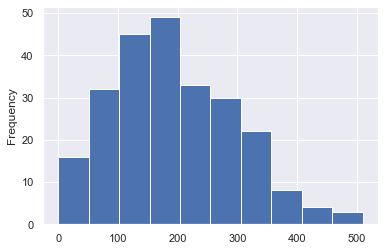

In [84]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df['calories'].plot.hist(bins=10)

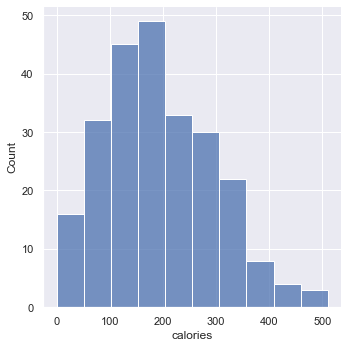

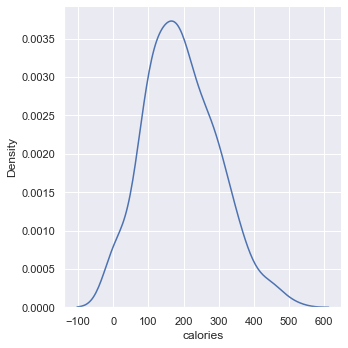

In [85]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x='calories', bins=10)
sns.displot(data=df, x='calories', kind='kde')

<AxesSubplot:xlabel='calories', ylabel='total fat'>

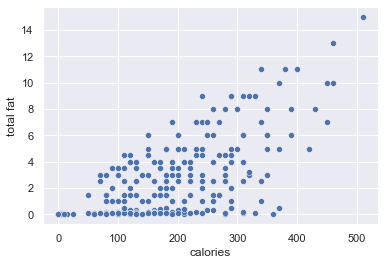

In [86]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x='calories', y='total fat')

<AxesSubplot:xlabel='calories', ylabel='Density'>

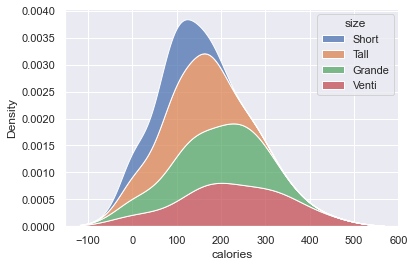

In [94]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
def assign_size(row):
    prep = row['beverage_prep']
    if isinstance(prep, float):
        row['size'] = 'N/A'
    elif 'Short' in prep:
        row['size'] = 'Short'
    elif 'Tall' in prep:
        row['size'] = 'Tall'
    elif 'Grande' in prep:
        row['size'] = 'Grande'
    elif 'Venti' in prep:
        row['size'] = 'Venti'
    else:
        row['size'] = 'N/A'
    return row

df = df.apply(lambda row: assign_size(row), axis=1)
df = df[df['size'] != 'N/A']

sns.kdeplot(data=df, x="calories", hue="size", multiple="stack")